In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime

# Thiết lập phong cách cho các biểu đồ
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Để đọc dữ liệu cổ phiếu từ Yahoo Finance
yf.pdr_override()

# Danh sách các cổ phiếu công nghệ
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Thiết lập thời gian bắt đầu và kết thúc để lấy dữ liệu
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Tải dữ liệu cổ phiếu cho từng công ty trong danh sách
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start, end)

# Gán tên công ty vào dữ liệu
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for stock, com_name in zip(tech_list, company_name):
    stock_data[stock]["company_name"] = com_name

# Kết hợp dữ liệu của tất cả các công ty thành một DataFrame
df = pd.concat(stock_data.values(), axis=0)

# Hiển thị 10 dòng cuối cùng của DataFrame
print(df.tail(10))




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-23  183.660004  184.759995  180.080002  181.050003  181.050003   
2024-05-24  181.649994  182.440002  180.300003  180.750000  180.750000   
2024-05-28  179.929993  182.240005  179.490005  182.149994  182.149994   
2024-05-29  181.699997  184.080002  181.550003  182.020004  182.020004   
2024-05-30  181.309998  181.339996  178.360001  179.320007  179.320007   
2024-05-31  178.300003  179.210007  173.869995  176.440002  176.440002   
2024-06-03  177.699997  178.699997  175.919998  178.339996  178.339996   
2024-06-04  177.639999  179.820007  176.440002  179.339996  179.339996   
2024-06-05  180.100006  181.500000  178.750000  181.279999  181.279999   
2024-06-06  181.750000  185.000000  181.490005  185.000000  185.000000   

              Volume company_name  
Date                               
2024-05-23  33670200       AMAZON  
202

In [7]:
# Summary Stats
import numpy as np
AAPL = pd.DataFrame({
    'Open': np.random.rand(1000),  # Example data, replace with your actual stock data
    'High': np.random.rand(1000),
    'Low': np.random.rand(1000),
    'Close': np.random.rand(1000),
    'Volume': np.random.rand(1000)
})
AAPL.describe() 

NameError: name 'AAPL' is not defined

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-07 to 2024-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


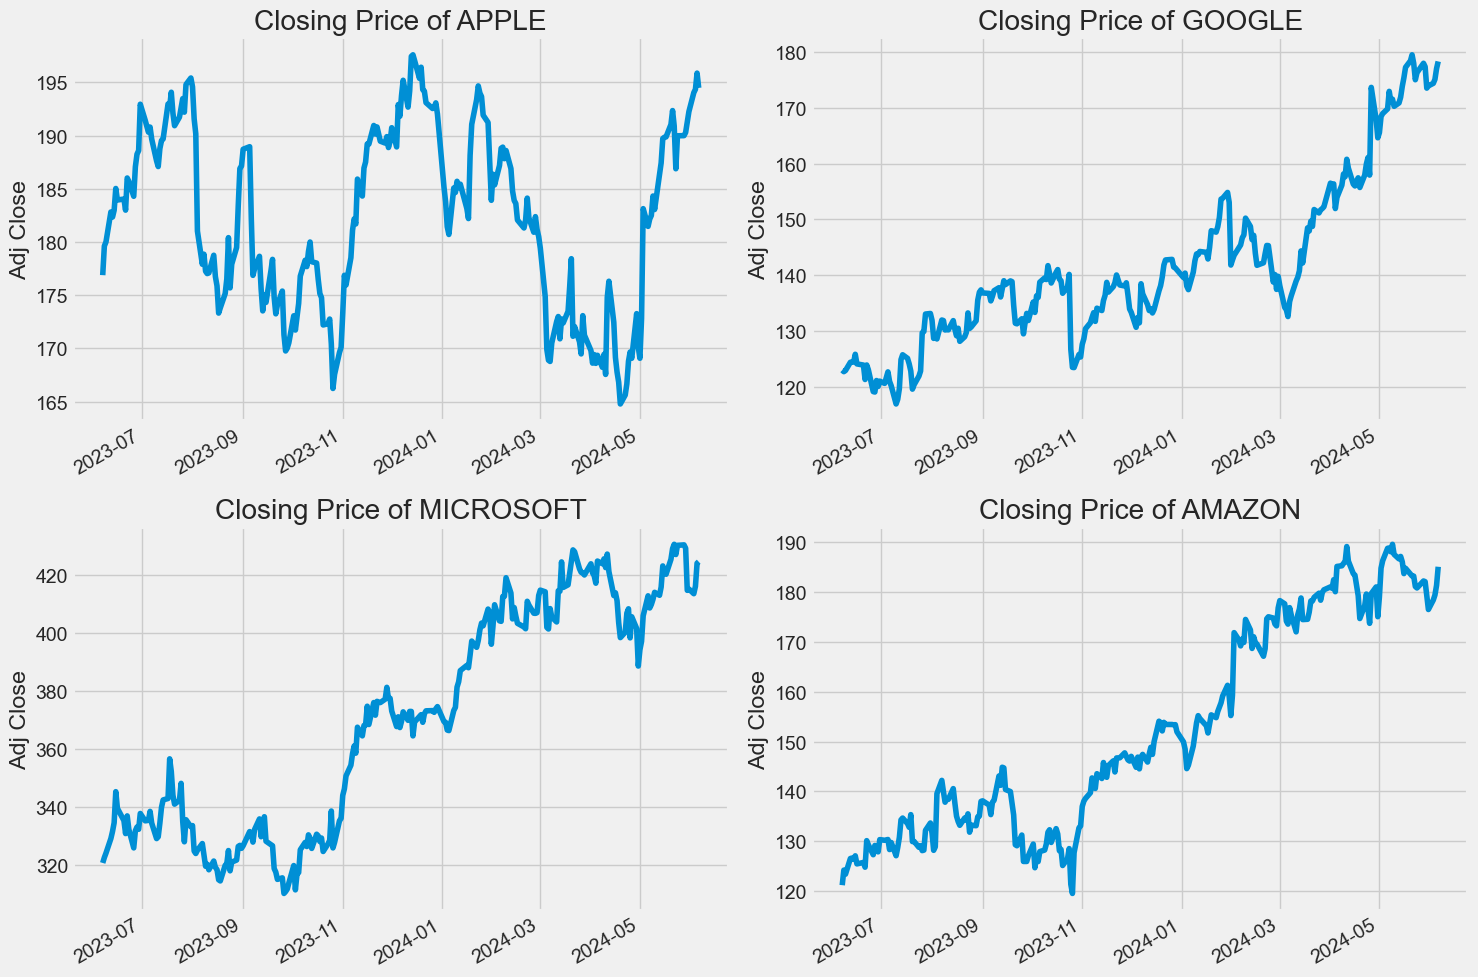

In [23]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, com_name) in enumerate(zip(tech_list, company_name), 1):
    plt.subplot(2, 2, i)
    stock_data[stock]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {com_name}")
    
plt.tight_layout()
plt.show()

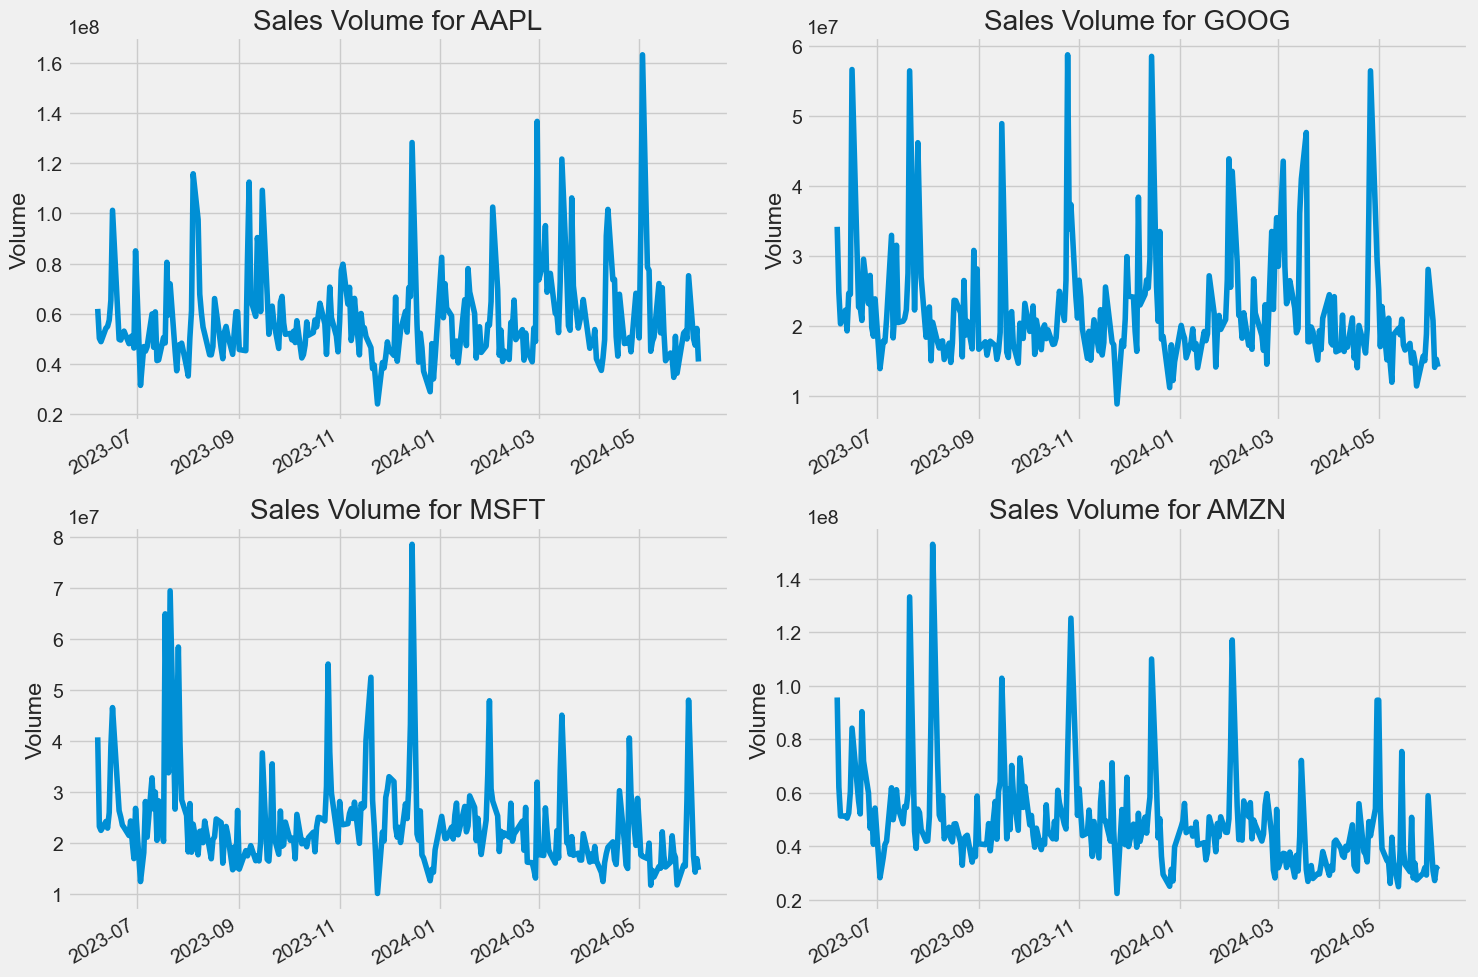

In [24]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

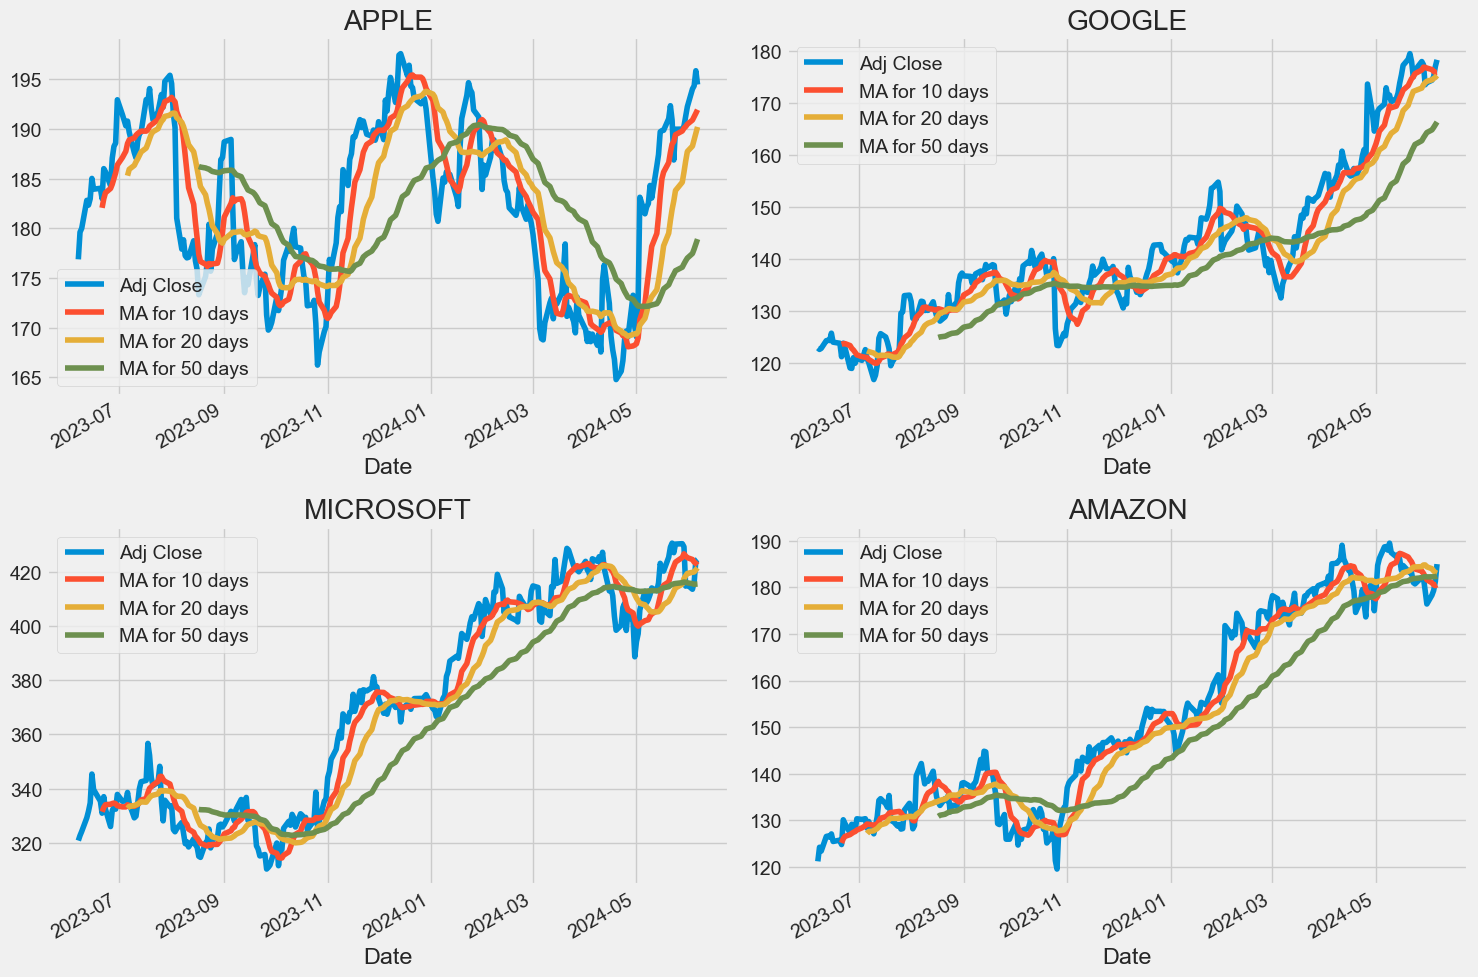

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for i, ax in enumerate(axes.flat):
    company = company_list[i]
    company_name = company_names[i]
    company[['Adj Close', f'MA for 10 days', f'MA for 20 days', f'MA for 50 days']].plot(ax=ax)
    ax.set_title(company_name)

fig.tight_layout()
plt.show()

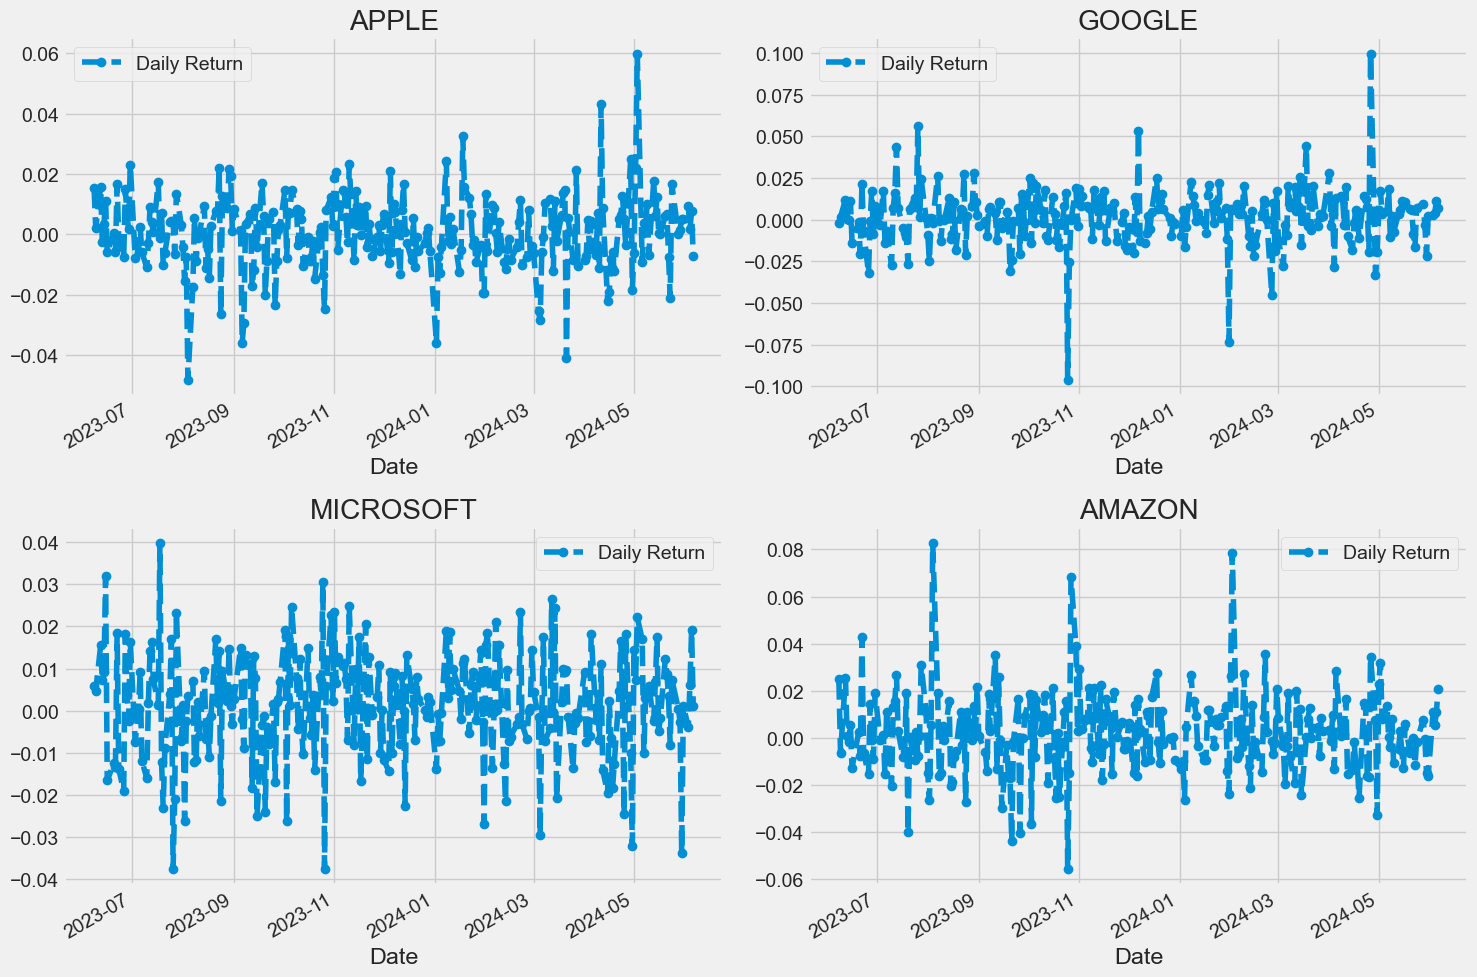

In [27]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

company_list[0]['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

company_list[1]['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

company_list[2]['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

company_list[3]['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


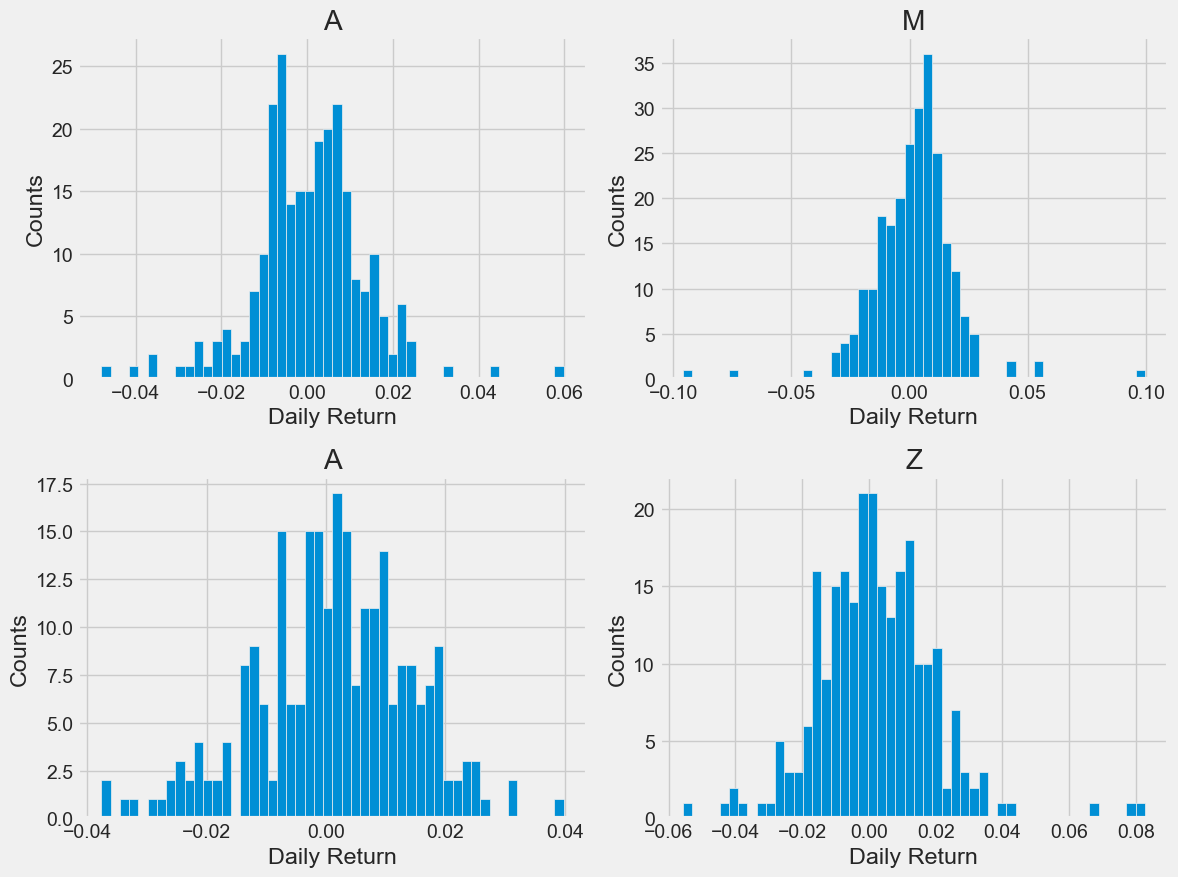

In [28]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [44]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Tạo DataFrame mới cho tỷ suất lợi nhuận của các cổ phiếu
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-07,NaN,NaN,NaN,NaN
2023-06-08,0.015465,0.024911,-0.002196,0.005814
2023-06-09,0.002160,-0.006600,0.001630,0.004704
2023-06-12,0.015639,0.025440,0.012045,0.015484
2023-06-13,-0.002612,0.000711,0.000643,0.007353


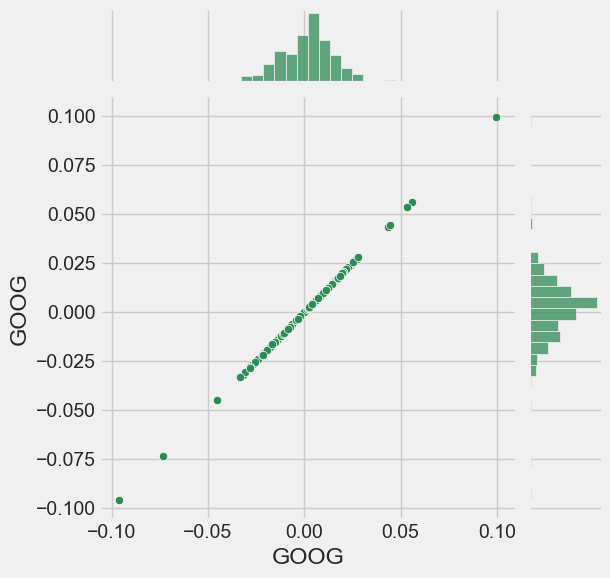

In [45]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

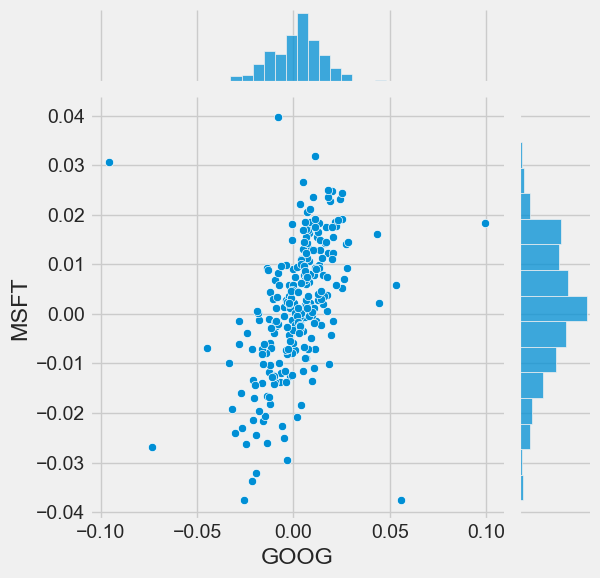

In [46]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

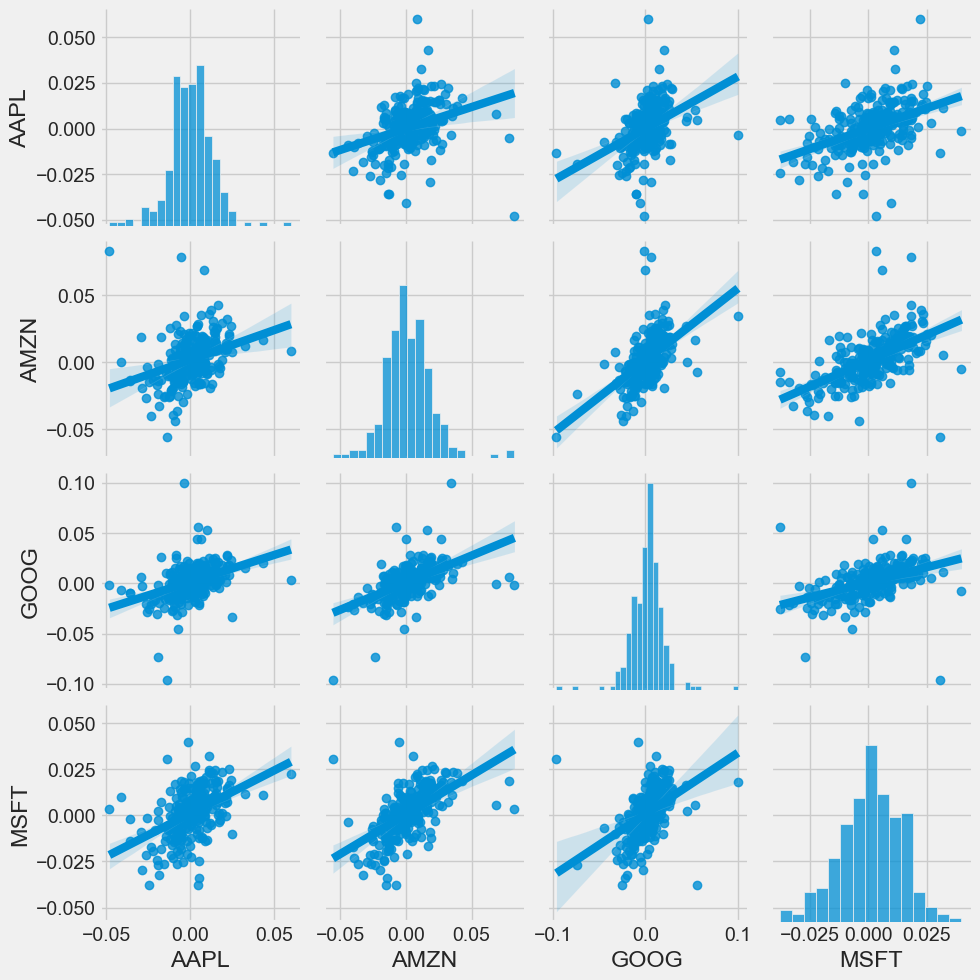

In [47]:
sns.pairplot(tech_rets, kind='reg')

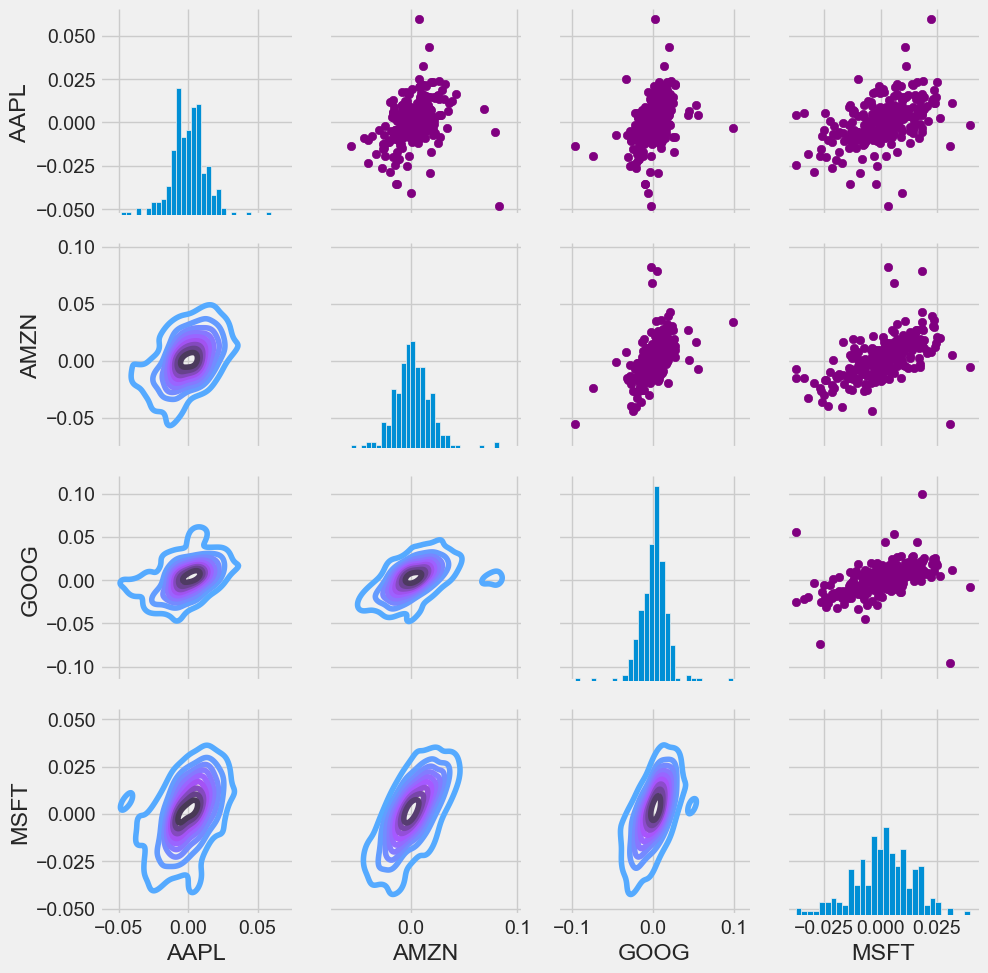

In [48]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

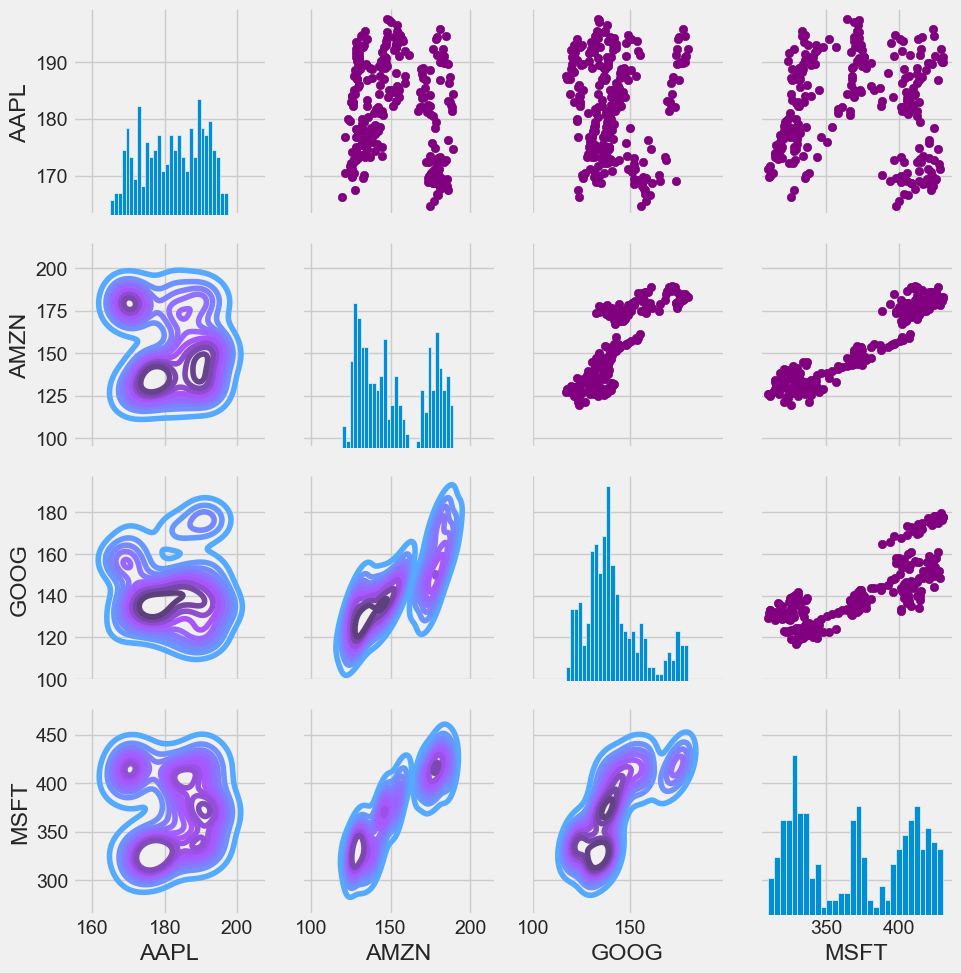

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

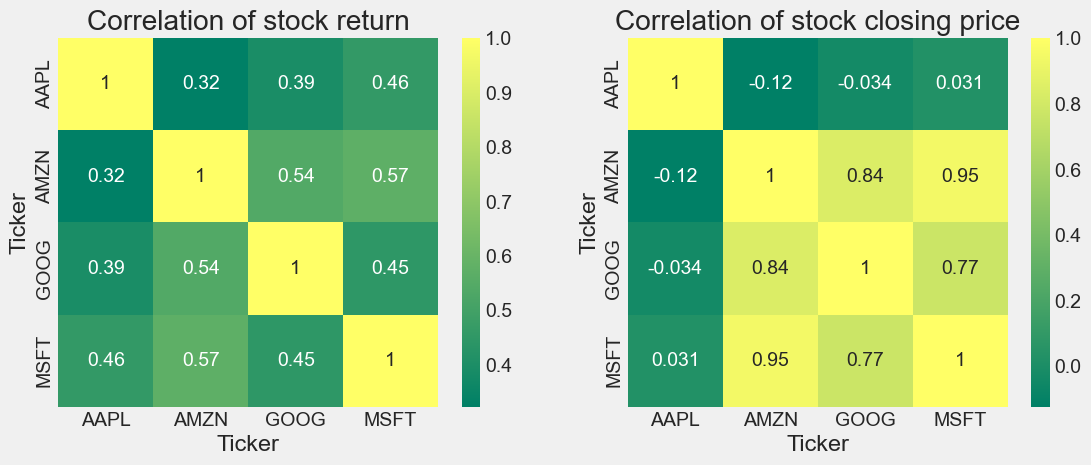

In [50]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

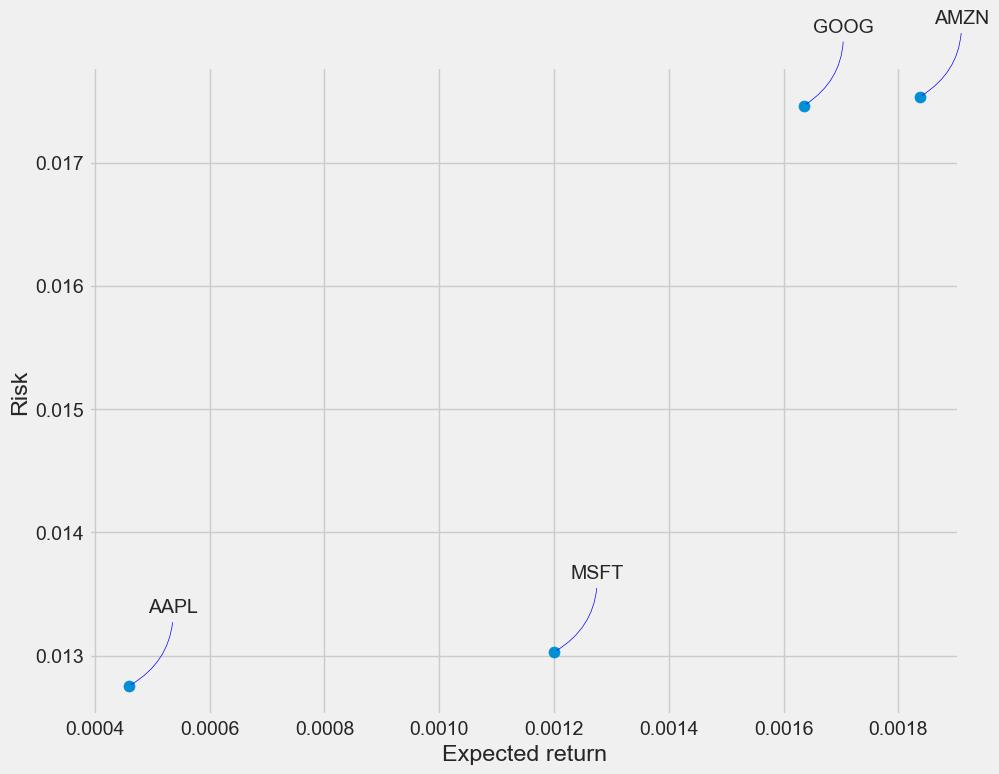

In [54]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

In [62]:
import yfinance as yf
from datetime import datetime

# Lấy dữ liệu cổ phiếu của Apple từ Yahoo Finance từ ngày 01/01/2012 đến ngày hiện tại
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Hiển thị dữ liệu
print(df)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.416982   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.483712   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.622308   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.754258   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.734030   
...                ...         ...         ...         ...         ...   
2024-05-31  191.440002  192.570007  189.910004  192.250000  192.250000   
2024-06-03  192.899994  194.990005  192.520004  194.029999  194.029999   
2024-06-04  194.639999  195.320007  193.029999  194.350006  194.350006   
2024-06-05  195.399994  196.899994  194.869995  195.869995  195.869995   
2024-06-06  195.684998  196.500000  194.169998  194.479996  194.479996   

               Volume  
Date         

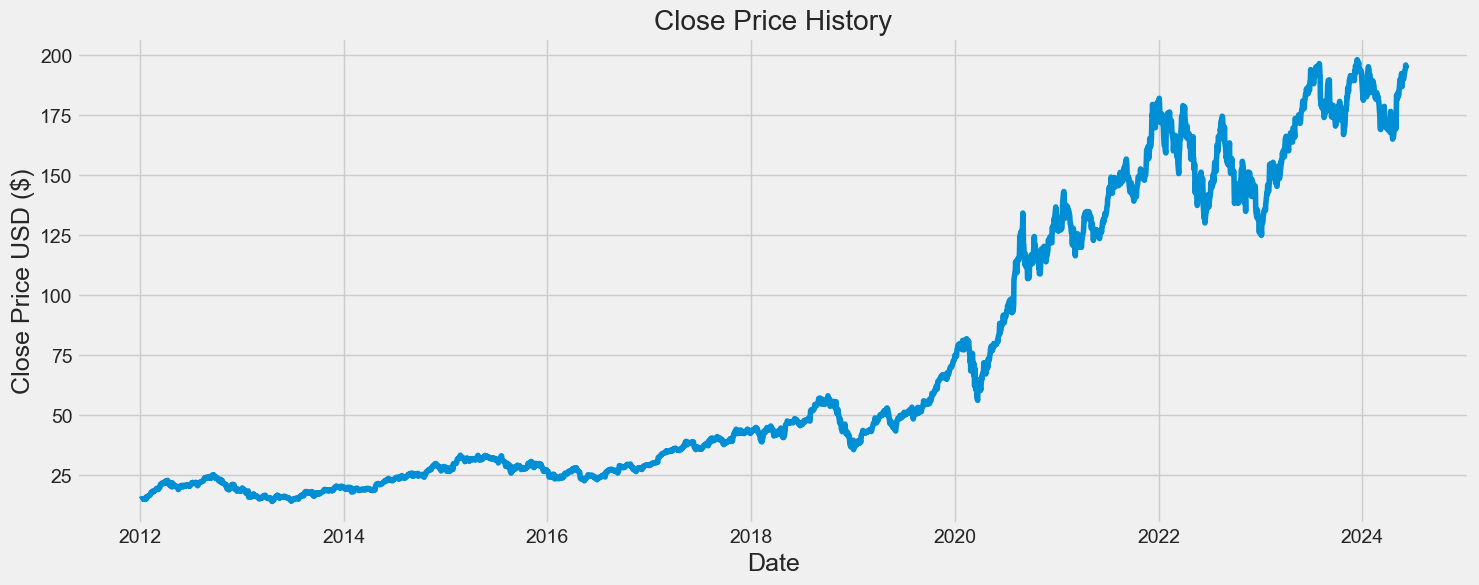

In [99]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [65]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2971

In [72]:
from sklearn.preprocessing import MinMaxScaler # type: ignore
import numpy as np

# Định nghĩa dữ liệu mẫu
dataset = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]])

# Scale dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Hiển thị dữ liệu sau khi được scale
print(scaled_data)


[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [10]:
import numpy as np

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Assuming 'scaled_data' is defined elsewhere

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Taking 60 previous data points as input
    y_train.append(train_data[i, 0])       # The next data point as output
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to fit the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


NameError: name 'scaled_data' is not defined

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

AttributeError: 'ellipsis' object has no attribute 'shape'